In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
upload = files.upload()
df = pd.read_csv('housing.csv')

Saving housing.csv to housing (1).csv


In [ ]:
import pandas as pd
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df = df.rename(columns={'MEDV': 'PRICE'})
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
X = df.drop('PRICE', axis = 1)
y = df['PRICE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=13, activation = 'relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='linear'))


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               1792      
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:

history = model.fit(X_train_scaled, y_train, validation_split = 0.2, epochs = 100)

Epoch 1/100
11/11 [==============================] - 1s 17ms/step - loss: 574.2377 - mae: 22.0698 - val_loss: 593.8059 - val_mae: 22.3315
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 518.2239 - mae: 20.7887 - val_loss: 523.2448 - val_mae: 20.7895
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 446.2822 - mae: 19.0557 - val_loss: 428.1805 - val_mae: 18.5283
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 349.8337 - mae: 16.5101 - val_loss: 303.2553 - val_mae: 15.2178
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 233.6438 - mae: 12.9242 - val_loss: 163.4906 - val_mae: 10.8672
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 128.3360 - mae: 8.8571 - val_loss: 70.6724 - val_mae: 6.9517
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 74.4961 - mae: 6.3966 - val_loss: 42.6348 - val_mae: 5.1964
Epoch 8/100
11/11 [============================

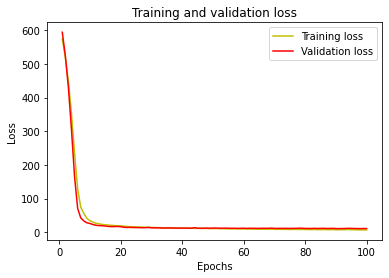

<function matplotlib.pyplot.show>

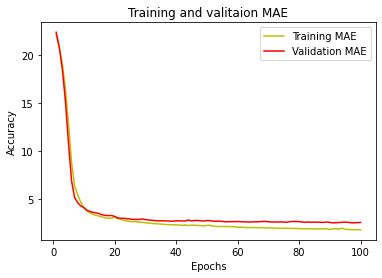

In [ ]:
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label = 'Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and valitaion MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show

In [ ]:
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

Predicted values are:  [[18.214418]
 [21.610186]
 [19.739138]
 [20.566046]
 [13.021142]]
Real values are:  498    21.2
94     20.6
150    21.5
221    21.7
423    13.4
Name: PRICE, dtype: float64


In [ ]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 3ms/step - loss: 14.5472 - mae: 2.8063
Mean squared error from neural net:  14.547211647033691
Mean absolute error from neural net:  2.8063251972198486


In [ ]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  16.49535197593167
Mean absolute error from linear regression:  3.055894153890959


In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error from decision tree: ', mse_dt)
print('Mean absolute error from decision tree: ', mae_dt)

Mean squared error from decision tree:  19.323529411764707
Mean absolute error from decision tree:  3.123529411764706


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10, random_state = 30)
model.fit(X_train_scaled, y_train)

y_pred_RF = model.predict(X_test_scaled)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error from Random Forest: ', mse_lr)
print('Mean absolute error from Random Forest: ', mae_lr)

Mean squared error from Random Forest:  16.49535197593167
Mean absolute error from Random Forest:  3.055894153890959


In [ ]:
import pandas as pd
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index = feature_list).sort_values
print(feature_imp)

<bound method Series.sort_values of CRIM       0.041846
ZN         0.000850
INDUS      0.006832
CHAS       0.000232
NOX        0.013179
RM         0.406793
AGE        0.010935
DIS        0.070053
RAD        0.002776
TAX        0.012763
PTRATIO    0.017368
B          0.007687
LSTAT      0.408686
dtype: float64>
